In [1]:
import itertools
import warnings

import matplotlib
from pyasn1.compat.octets import null
from sklearn.metrics import silhouette_score
from text_unidecode import unidecode
from collections import deque
from tqdm import tqdm
warnings.filterwarnings('ignore')
import csv
from konlpy.tag import Okt
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.patches as mpatcheso
import seaborn as sns
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, HTML
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
from sklearn.preprocessing import StandardScaler


Q41= pd.read_excel('Q_new_클러스터_v0.5.xlsx')

total = pd.read_excel("잡코리아_합격자소서 @220310.xlsx")

In [3]:
dup_total= total.drop_duplicates(['Q1','Q2','Q3','Q4','Q5']) #완벽히 중복질문 제거
total1=total.fillna('0') #널값 0으로 대체
#dup_total= total1.drop_duplicates(['Q1','Q2','Q3','Q4','Q5'])
print(dup_total)

        No          기업명                           제목  \
0        1    LX Pantos        2021년 하반기 신입 재무·세무·IR   
1        2      (주)문화방송           2022년 상반기 신입 디자인기타   
2        3       근로복지공단        2021년 하반기 인턴 사무·원무·코디   
3        4     일진머티리얼즈㈜       2021년 하반기 신입 화학·에너지·환경   
4        5  한국의료기기안전정보원        2022년 상반기 신입 기획·전략·경영   
...    ...          ...                          ...   
5607  5608    (주)본푸드시스템         2015년 하반기 인턴 응용프로그래머   
5610  5611        (주)한화  2015년 하반기 인턴 생산관리·공정관리·품질관리   
5611  5612        CJ건설㈜     2015년 하반기 신입 시공·현장·감리·공무   
5614  5615      LG디스플레이  2015년 하반기 신입 생산관리·공정관리·품질관리   
5615  5616       엘에스전선㈜     2015년 하반기 신입 생산·제조·설비·조립   

                                                  합격자정보  \
0     서울4년/경영학과/학점 4.15/4.5/토익 965/오픽 IH/제2외국어 1개/해외...   
1     서울4년/공연영상창작학부(공간연출전공)/학점 3.78/4.5/오픽 IM2/자격증 2...   
2     지방4년/한문학과/학점 3.26/4.5/자격증 2개/인턴 1회/수상 2회/사회활동 ...   
3                      지방4년/신소재 공학/학점 3.7/4.5/토스 Level7   
4     대학원/국제의료경영학과/학점 2.71/4.5/토

In [4]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
Qtokoken = []
Atokoken = []
for sentence in tqdm(total1['Q1']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Qtokoken.append(stopwords_removed_sentence)
    
for sentence in tqdm(total1['Q2']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Qtokoken.append(stopwords_removed_sentence)
    
for sentence in tqdm(total1['Q3']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Qtokoken.append(stopwords_removed_sentence)
    
for sentence in tqdm(total1['Q4']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Qtokoken.append(stopwords_removed_sentence)
    
for sentence in tqdm(total1['Q5']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    Qtokoken.append(stopwords_removed_sentence)


100%|██████████| 5617/5617 [00:03<00:00, 1620.24it/s]


In [5]:
#완전히 같은 내용(의미 x)의 텍스트만 제거
print(len(Qtokoken))
print(Qtokoken)
Qtokoken_save = Qtokoken

28085
[['해당', '회사', '및', '직무', '지원', '동기', '대해', '기술', '시기'], ['지원', '동기'], ['고객', '마인드', '고객', '위', '헌신', '상담', '능력', '등'], ['지원', '동기', '및', '포부'], ['한국', '의료기기', '안전', '정보원', '지원', '동기', '및', '우리', '대해', '서술', '시오', '최대', '이하'], ['성장', '과정', '이내'], ['분야', '역량', '위해', '노력', '경험', '대해', '기술', '당시', '상황', '구체', '시점', '것', '노력', '구체', '기술', '것', '결과', '및', '그', '과정', '점', '상세', '기술', '것'], ['우리', '회사', '희망', '직무', '선택', '동기', '기술'], ['자신', '성장', '배경', '대해', '다음', '가지', '내용', '포함', '작성', '환경', '경험', '다른', '사람과', '신뢰', '형성', '경험', '최소', '최대', '입력', '가능'], ['자신', '영향', '사건', '인물', '등', '포함', '본인', '가지', '가장', '가치관', '무엇', '설명'], ['금호', '타이어', '지원', '동기', '금호', '타이어', '본인', '선발', '이유', '설명'], ['본인', '성격', '장단점', '자신', '성장', '과정', '경험', '기반', '서술', '시오', '최소', '최대', '입력', '가능'], ['본인', '회사', '선택', '기준', '무엇', '중공업', '그룹', '측면', '그', '기준', '생각', '기술'], ['본인', '가지', '해시태그', '표현', '등', '최소', '최대', '입력', '가능'], ['솔선수범', '관리', '감독', '스스로', '업무', '처리', '남', '업무', '궂', '일도', '주도', '해결', '중', '택', '

In [6]:
Q_del_tump = ['이하','위','등','및','시오','이내','위해','대해','것','구체','그','상세','입력','작성','가능','가장','설명','궃','대체','수','통해','부항','가지','목','체','점','개','후','내외','앞','입','주','중','곳','바','서술','계','통','준','나','때', '속', '그것', '내', '관', '거나', '더', '부분', '여러분', '줄', '외', '해', '또한', '예', '각', '우선', '로서', '끝', '꼭', '문항', '이제', '조금', '부문', '그때', '안', '교', '알', '비', '주시', '직', '자의', '만', '업','데', '움', '샘', '온', '회', '뒤', '순', '두','또','강','면','택','합','먼저']

In [7]:
for i in range(len(Qtokoken)):
    for j in range(len(Q_del_tump)):
        t = Q_del_tump[j]
        if t in Qtokoken[i]:
            Qtokoken[i].remove(t)
        else:
            continue
print(len(Qtokoken))

28085


In [10]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = Qtokoken, vector_size = 300, window = 5, min_count = 0, workers = 5, sg = 0)
model.save('./Qwordvec_real.model')

In [11]:
print(model.wv.most_similar("지원"))

[('희망', 0.8040682673454285), ('유플러스', 0.7978658676147461), ('부', 0.7977792620658875), ('여러분', 0.7973830699920654), ('제일제당', 0.7962972521781921), ('계열', 0.7816838026046753), ('해당', 0.7812438011169434), ('직무', 0.7781590819358826), ('사시', 0.777495265007019), ('농업정책', 0.7755369544029236)]


자기소개서의 질문 명사 가장 많은 것 : 94
자기소개서 질문의 평균 명사 수 : 7.147836923624711


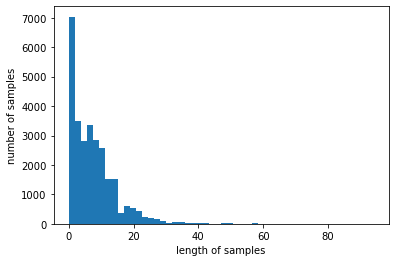

In [12]:
print('자기소개서의 질문 명사 가장 많은 것 :',max(len(review) for review in Qtokoken))
print('자기소개서 질문의 평균 명사 수 :',sum(map(len, Qtokoken))/len(Qtokoken))
plt.hist([len(review) for review in Qtokoken], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [234]:
# print(model.wv.vectors) 모델안의 키워드들의 벡터공간 좌표
# print(model.wv.index_to_key) 모델안의 키워드들
#실루엣 평가
sil = []
word_vectors = model.wv.vectors

range_n_clusters = range(3, 8)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(word_vectors)
    silhouette_avg = silhouette_score(word_vectors, cluster_labels)
    print("For n_clusters1 =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

print(sil)
#시오같은 부사? 들 없앤게 실루엣 점수가 더높음 우선 4로 둘다해보자

For n_clusters1 = 3 The average silhouette_score is : 0.611927
For n_clusters1 = 4 The average silhouette_score is : 0.5718157
For n_clusters1 = 5 The average silhouette_score is : 0.56047064
For n_clusters1 = 6 The average silhouette_score is : 0.5362358
For n_clusters1 = 7 The average silhouette_score is : 0.5398935
For n_clusters2 = 3 The average silhouette_score is : 0.5398935
For n_clusters2 = 4 The average silhouette_score is : 0.5398935
For n_clusters2 = 5 The average silhouette_score is : 0.5398935
For n_clusters2 = 6 The average silhouette_score is : 0.5398935
For n_clusters2 = 7 The average silhouette_score is : 0.5398935
[0.611927, 0.5718157, 0.56047064, 0.5362358, 0.5398935]
[0.5398935, 0.5398935, 0.5398935, 0.5398935, 0.5398935]


In [247]:
#3개로
word_vectors = model.wv.vectors

kmeans_clustering3 = KMeans(n_clusters=3)
cut3 = kmeans_clustering3.fit(word_vectors)
label3 = kmeans_clustering3.labels_
kmeans_clustering3.fit_transform(word_vectors)
idx3 = kmeans_clustering3.fit_predict(word_vectors)
Xt3 = kmeans_clustering3.fit_transform(word_vectors)
print(label3)

Xt3 = list(Xt3)
idf3 = kmeans_clustering3.cluster_centers_
idf3 = list(idf3)
idx3 = list(idx3)
names3 = model.wv.index_to_key#index2word
center3 = []
word_centroid_map3 = {names3[i]: idx3[i] for i in range(len(names3))}


matplotlib.rcParams["axes.unicode_minus"] = False

vocab3 = list(model.wv.index_to_key)

# X = model2[vocab]

temp3 = []
for i in range(len(vocab3)):
    a = names3.index(vocab3[i])
    temp3.append(idx3[a])

demen3 = []
print(len(Xt3[0]))
for i in range(len(Xt3)):
    to = []
    for j in range(len(Xt3[i])):
        to.append(str(Xt3[i][j]))
    demen3.append(to)

[2 0 2 ... 1 1 1]
3


In [248]:
tump = []

for i in range(len(vocab)):
    tet =[]
    tet.append(vocab[i])
    tet.append(temp[i])
    tump.append(tet)
# print(tump)
    
print(len(tump))
print(len(vocab))

tump3 = []

for i in range(len(vocab3)):
    tet =[]
    tet.append(vocab3[i])
    tet.append(temp3[i])
    tump3.append(tet)
# print(tump3)
    
print(len(tump3))
print(len(vocab3))

3133
3133
3133
3133


In [249]:
#카운트
from functools import reduce 
import operator

#1차원 리스트로 변환
Qword = list(reduce(operator.add, Qtokoken))

import nltk
from nltk import FreqDist

Q2nvocab1 = FreqDist(np.hstack(Qword))
Q2nvocab1 = Q2nvocab1.most_common(500)
Q2tokokenx= pd.DataFrame(Q2nvocab1)
Q2tokokenx.columns=["word","count"]
Q2tokokenx.to_excel('./Q_new_만돌린것.xlsx')
print(Q2tokokenx)
print(Q2nvocab1)



    word  count
0     기술   9078
1     경험   7144
2     본인   6282
3     지원   4878
4     직무   3794
..   ...    ...
495   확인     33
496   명시     33
497  슬로건     33
498   상품     33
499   합의     33

[500 rows x 2 columns]
[('기술', 9078), ('경험', 7144), ('본인', 6282), ('지원', 4878), ('직무', 3794), ('무엇', 3466), ('이유', 2809), ('자신', 2684), ('과정', 2593), ('입사', 2417), ('노력', 2390), ('동기', 2372), ('생각', 2105), ('목표', 1899), ('수행', 1761), ('성장', 1722), ('시기', 1619), ('역량', 1531), ('관련', 1496), ('선택', 1393), ('분야', 1374), ('해당', 1348), ('사례', 1316), ('대하', 1250), ('활동', 1235), ('결과', 1229), ('일', 1204), ('회사', 1072), ('포부', 1056), ('업무', 995), ('성격', 987), ('해결', 950), ('조직', 890), ('귀하', 871), ('달성', 867), ('극복', 865), ('포함', 864), ('문제', 849), ('경력', 810), ('강점', 788), ('최근', 787), ('대한', 760), ('상황', 748), ('소개', 742), ('이상', 733), ('사항', 727), ('준비', 714), ('행동', 706), ('내용', 682), ('생활', 675), ('최대', 654), ('도전', 625), ('역할', 623), ('계획', 614), ('다른', 598), ('성과', 592), ('장단점', 590), ('관심', 590), 

In [250]:
tt = []
for i in range(len(vocab)):
    for j in range(len(Q2nvocab1)):
        if Q2nvocab1[j][0] in tump[i]:
            ting =[]
            ting.append(Q2nvocab1[j][0])
            ting.append(Q2nvocab1[j][1])
            ting.append(tump[i][1])
            tt.append(ting)
Q_Nword = pd.DataFrame(tt)

tt3 = []
for i in range(len(vocab)):
    for j in range(len(Q2nvocab1)):
        if Q2nvocab1[j][0] in tump3[i]:
            ting =[]
            ting.append(Q2nvocab1[j][0])
            ting.append(Q2nvocab1[j][1])
            ting.append(tump3[i][1])
            tt3.append(ting)
Q3k_Nword = pd.DataFrame(tt3)

Q_Nword.columns=["word","count","label"]
Q3k_Nword.columns=["word","count","label"]
print(Q_Nword)
print(Q3k_Nword)
Q3k_Nword.to_excel('./Q3k_new_클러스터_v0.5.xlsx')

    word  count  label
0     기술   9078      3
1     경험   7144      2
2     본인   6282      3
3     지원   4878      1
4     직무   3794      1
..   ...    ...    ...
495   상품     33      3
496   명시     33      3
497   확인     33      3
498   이수     33      3
499   합의     33      3

[500 rows x 3 columns]
    word  count  label
0     기술   9078      2
1     경험   7144      1
2     본인   6282      2
3     지원   4878      2
4     직무   3794      2
..   ...    ...    ...
495   상품     33      2
496   명시     33      2
497   확인     33      2
498   이수     33      2
499   합의     33      0

[500 rows x 3 columns]


In [178]:
print(len(tt))
print(vocab[0])
print(tt[0])

500
기술
['기술', 9078, 1]


In [297]:
c0_cnt = 0
c1_cnt = 0
c2_cnt = 0
c3_cnt = 0
for i in range(len(tump)):
    if tump[i][1] == 0:
        c0_cnt+=1
    elif  tump[i][1] == 1:
        c1_cnt+=1
    elif tump[i][1] == 2:
        c2_cnt+=1
    elif tump[i][1] == 3:
        c3_cnt+=1
print(c0_cnt)
print(c1_cnt)
print(c2_cnt)
print(c3_cnt)
print(len(tump))

2350
77
101
605
3133


In [299]:
c0_cnt = 0
c1_cnt = 0
c2_cnt = 0
c3_cnt = 0
for i in range(len(tump3)):
    if tump3[i][1] == 0:
        c0_cnt+=1
    elif  tump3[i][1] == 1:
        c1_cnt+=1
    elif tump3[i][1] == 2:
        c2_cnt+=1
    elif tump3[i][1] == 3:
        c3_cnt+=1
print(c0_cnt)
print(c1_cnt)
print(c2_cnt)
print(c3_cnt)
print(len(tump3))


2494
119
520
0
3133


In [253]:
c0_cnt2 = 0
c1_cnt2 = 0
c2_cnt2 = 0
c3_cnt2 = 0
for i in range(len(tt)):
    if tt[i][2] == 0:
        c0_cnt2+=1
    elif  tt[i][2] == 1:
        c1_cnt2+=1
    elif tt[i][2] == 2:
        c2_cnt2+=1
    elif tt[i][2] == 3:
        c3_cnt2+=1
print(c0_cnt2)
print(c1_cnt2)
print(c2_cnt2)
print(c3_cnt2)

6
77
101
316


In [254]:
c0_cnt2 = 0
c1_cnt2 = 0
c2_cnt2 = 0
c3_cnt2 = 0
for i in range(len(tt3)):
    if tt3[i][2] == 0:
        c0_cnt2+=1
    elif  tt3[i][2] == 1:
        c1_cnt2+=1
    elif tt3[i][2] == 2:
        c2_cnt2+=1
    elif tt3[i][2] == 3:
        c3_cnt2+=1
print(c0_cnt2)
print(c1_cnt2)
print(c2_cnt2)
print(c3_cnt2)

22
119
359
0


In [308]:
word=Q41['word'].values.tolist()
tfidftotal= total[['Q1','Q2','Q3','Q4','Q5']]
tfidftotal = tfidftotal.dropna()
tf_total=tfidftotal.values.tolist()
em_list = []
for i in range(len(tf_total)):
    for item in tf_total[i]:
        em_list.append(str.lower(item))
# print(em_list)
tfidf_vectorizer.fit(em_list)
# print(tfidf_vectorizer.vocabulary_)

TfidfVectorizer()

In [309]:
plus = pd.read_excel('./인천추가제안엑셀v0.2.xlsx')

In [323]:
plus_w_l = plus[['word','label']]

In [328]:
plus_w_l_list = plus_w_l.values.tolist()
print(plus_w_l_list)
print(len(plus_w_l_list))

[['기술', 2], ['경험', 1], ['본인', 0], ['지원', 2], ['직무', 2], ['무엇', 2], ['이유', 2], ['자신', 2], ['과정', 1], ['입사', 2], ['노력', 1], ['동기', 2], ['생각', 2], ['목표', 1], ['수행', 2], ['성장', 0], ['시기', 2], ['역량', 2], ['관련', 2], ['선택', 2], ['분야', 2], ['사례', 1], ['활동', 2], ['결과', 1], ['일', 1], ['회사', 0], ['포부', 2], ['업무', 2], ['성격', 0], ['해결', 1], ['조직', 1], ['귀하', 0], ['달성', 1], ['극복', 1], ['포함', 2], ['문제', 1], ['경력', 2], ['강점', 0], ['최근', 1], ['상황', 1], ['소개', 0], ['이상', 2], ['준비', 2], ['행동', 1], ['내용', 2], ['생활', 0], ['최대', 2], ['도전', 1], ['역할', 1], ['계획', 2], ['다른', 0], ['성과', 1], ['장단점', 2], ['관심', 2], ['사회', 2], ['사람', 1], ['중심', 2], ['열정', 1], ['단점', 2], ['방식', 1], ['희망', 2], ['능력', 2], ['성취', 1], ['근거', 2], ['인재', 0], ['최소', 2], ['기여', 2], ['가치관', 0], ['계기', 2], ['영향', 1], ['장점', 2], ['시도', 1], ['현재', 2], ['가치', 0], ['인물', 1], ['성공', 1], ['타인', 1], ['팀', 1], ['프로젝트', 2], ['우리', 2], ['갈등', 1], ['지원동', 2], ['지식', 2], ['기억', 0], ['인생', 1], ['왜', 2], ['개발', 2], ['기준', 2], ['진행', 1], ['기존', 1], ['발전', 

In [348]:
c0_plus = []
c1_plus = []
c2_plus = []
for i in range(len(plus_w_l_list)):
    if plus_w_l_list[i][1] == 0:
        c0_plus.append(plus_w_l_list[i][0])
    elif plus_w_l_list[i][1] == 1:
        c1_plus.append(plus_w_l_list[i][0])
    elif plus_w_l_list[i][1] == 2:
        c2_plus.append(plus_w_l_list[i][0])
print(len(c0_plus))
print(len(c1_plus))
print(len(c2_plus))

16
34
50


In [332]:
total1 = total[['A1','Q1']]
total2 = total[['A2','Q2']]
total3 = total[['A3','Q3']]
total4 = total[['A4','Q4']]
total5 = total[['A5','Q5']]
total1.columns = ['A','Q']
total2.columns = ['A','Q']
total3.columns = ['A','Q']
total4.columns = ['A','Q']
total5.columns = ['A','Q']

In [350]:
print(total1)
print(total2)

                                                      A  \
0     "실무경험과 어학능력을 갖춘 멀티플레이어"\n\n제게는 경영관리와 관련된 두 번의 ...   
1     학창 시절에 방송국 스튜디오 체험 학습에 참여한 적이 있습니다. 각 분야의 스태프,...   
2     "든든한 파트너"\n\n고객을 응대할 때는 작은 차이를 만드는 세심한 관심이 깊은 ...   
3     수능시험을 치른 후, ‘나는 무슨 일을 하며 살면 좋을까’ 고민을 시작했습니다. 이...   
4     "미래의 마에스트로"\n\n한국의료기기안전정보원 의료기기의 글로벌 경쟁력을 확보해 ...   
...                                                 ...   
5612  저는 어린 시절 농구를 좋아해 농구화를 사고 싶어 아르바이트를 했습니다. 큰 돈은 ...   
5613  남들을 배려하며 착하게 사는 것이 옳다고 배우며 살아왔기 때문에, 이타적인 성향이 ...   
5614  2013년 여름, 천호식품에서 아르바이트를 했었습니다. 제품 생산에서부터 포장, 운...   
5615  [노력하는 인재]\n선배들의 추천을 받아 13년도 동아리 회장을 맡았습니다. 당시 ...   
5616  [Be the first? Do the best!!]\n최초를 시도한 기업은 많습니...   

                                                      Q  
0                  해당회사 및 직무에 지원하는 동기에 대해 기술해 주시기 바랍니다.  
1                                                  지원동기  
2                             고객마인드 (고객을 위한 헌신, 상담능력 등)  
3                                             지원동기 및 포부  
4

In [321]:
for i in range(1, 6):
    for j in range(1, 4):
        for z in range(len(globals()['c{}_plus'.format(j)]))
            tting = globals()['total{}'.format(i)]['Q'].str.contains(globals()['c{}_plus'.format(j)][z])
            

,A1,Q1
0,"""실무경험과 어학능력을 갖춘 멀티플레이어""\n\n제게는 경영관리와 관련된 두 번의 ...",해당회사 및 직무에 지원하는 동기에 대해 기술해 주시기 바랍니다.
1,"학창 시절에 방송국 스튜디오 체험 학습에 참여한 적이 있습니다. 각 분야의 스태프,...",지원동기
2,"""든든한 파트너""\n\n고객을 응대할 때는 작은 차이를 만드는 세심한 관심이 깊은 ...","고객마인드 (고객을 위한 헌신, 상담능력 등)"
3,"수능시험을 치른 후, ‘나는 무슨 일을 하며 살면 좋을까’ 고민을 시작했습니다. 이...",지원동기 및 포부
4,"""미래의 마에스트로""\n\n한국의료기기안전정보원 의료기기의 글로벌 경쟁력을 확보해 ...",한국의료기기안전정보원에 지원하게 된 동기 및 우리원에 대해 자유롭게 서술해 주십시오...
...,...,...
5612,저는 어린 시절 농구를 좋아해 농구화를 사고 싶어 아르바이트를 했습니다. 큰 돈은 ...,성장과정
5613,"남들을 배려하며 착하게 사는 것이 옳다고 배우며 살아왔기 때문에, 이타적인 성향이 ...","본인의 성격, 성장과정, 가치관 등을 기술하시오."
5614,"2013년 여름, 천호식품에서 아르바이트를 했었습니다. 제품 생산에서부터 포장, 운...",LG디스플레이 및 지원 직무에 지원하는 동기에 대해 기술해 주십시오. (500~10...
5615,[노력하는 인재]\n선배들의 추천을 받아 13년도 동아리 회장을 맡았습니다. 당시 ...,"본인에 대하여 소개해 주시기 바랍니다. (성장과정, 경험, 성격, 강/약점, 가치관..."


In [363]:
#클러스터 0값들 모으기
tting_1 = pd.DataFrame()
for z in range(len(c0_plus)):
    globals()['tump_{}'.format(z)]= total1['Q'].str.contains(c0_plus[z])
    print(sum(globals()['tump_{}'.format(z)]))
    if len(c0_plus) == 
    result1 = pd.concat([globals()['tump_{}'.format(z)],globals()['tump_{}'.format(z)]])
    
# for z in range(len(c0_plus)):
#     tting_2 = total2['Q'].str.contains(c0_plus[z])
# for z in range(len(c0_plus)):
#     tting_3 = total1['Q'].str.contains(c0_plus[z])
# for z in range(len(c0_plus)):
#     tting_4 = total1['Q'].str.contains(c0_plus[z])
# for z in range(len(c0_plus)):
#     tting_5 = total1['Q'].str.contains(c0_plus[z])


1449
1067
636
293
244
231
451
185
60
86
171
235
49
24
92
24


In [385]:
Btotal= total[['Q1','A1','Q2','A2','Q3','A3','Q4','A4','Q5','A5']]
Btotal=Btotal.fillna('0') #널값 0으로 대체
test=Btotal.values.tolist()
test[0][0]#q1 = 0, q2 = 2, q3 = 4, q4 = 6, q5 = 8, 
print(len(test))
print(len(test[0]))
#0 1 3 5 7 9

5617
10


In [386]:
print(test[0][6])

0


In [400]:
clust0_total1 =[]
for i in range(len(test)):
    for j in range(0,len(test[i]),2):
        for z in range(len(c0_plus)):
            if c0_plus[z] in test[i][j]:
                clust0_total1.append(test[i][j+1])

clust1_total1 =[]
for i in range(len(test)):
    for j in range(0,len(test[i]),2):
        for z in range(len(c1_plus)):
            if c1_plus[z] in test[i][j]:
                clust1_total1.append(test[i][j+1])
clust2_total1 =[]
for i in range(len(test)):
    for j in range(0,len(test[i]),2):
        for z in range(len(c2_plus)):
            if c2_plus[z] in test[i][j]:
                clust2_total1.append(test[i][j+1])                
print(len(clust0_total1))
print(len(clust1_total1))
print(len(clust2_total1))


18278
34717
68509


In [402]:
clust0_total = pd.DataFrame(clust0_total1)
clust1_total = pd.DataFrame(clust1_total1)
clust2_total = pd.DataFrame(clust2_total1)
clust0_total=clust0_total.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
clust1_total=clust1_total.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
clust2_total=clust2_total.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [407]:
clust0_total.to_excel('0클러스터말뭉치.xlsx')

In [408]:
clust1_total.to_excel('1클러스터말뭉치.xlsx')

In [409]:
clust2_total.to_excel('2클러스터말뭉치.xlsx')

In [ ]:
QQto = Qtotal['']
contains_korea_or_japan = df['country'].str.contains("Japan|Korea")
